# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()

### Download Cifar10 dataset

In [ ]:
torch.cuda.is_available()

True

In [ ]:
DATA_PATH = '/content/'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

100%|██████████| 170498071/170498071 [00:06<00:00, 27788760.45it/s]


Extracting /content/cifar-10-python.tar.gz to /content/
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [ ]:
train_loader.batch_size

64

In [ ]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Streaming output truncated to the last 5000 lines.
          ...,
          [ 2.0607e+00,  1.9972e+00,  2.0131e+00,  ...,  1.9655e+00,
            1.9655e+00,  1.9813e+00],
          [ 2.0607e+00,  1.9813e+00,  1.9972e+00,  ...,  1.9655e+00,
            1.9496e+00,  1.9813e+00],
          [ 2.0607e+00,  1.9496e+00,  1.9655e+00,  ...,  1.9655e+00,
            1.9496e+00,  1.9655e+00]],

         [[ 2.1317e+00,  2.0510e+00,  2.0510e+00,  ...,  2.0510e+00,
            2.0349e+00,  2.0349e+00],
          [ 2.1317e+00,  2.0671e+00,  2.0994e+00,  ...,  2.0833e+00,
            2.0671e+00,  2.0671e+00],
          [ 2.1317e+00,  2.0349e+00,  2.0510e+00,  ...,  2.0510e+00,
            2.0510e+00,  2.0510e+00],
          ...,
          [ 2.1317e+00,  2.0671e+00,  2.0833e+00,  ...,  2.0349e+00,
            2.0349e+00,  2.0510e+00],
          [ 2.1317e+00,  2.0510e+00,  2.0671e+00,  ...,  2.0349e+00,
            2.0187e+00,  2.0510e+00],
          [ 2.1317e+00,  2.0187e+00,  2.0349e+00,  ...,  2.03

### Using  GPUs

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


### Mostrar imágenes

La imagen muestreada representa un: cat


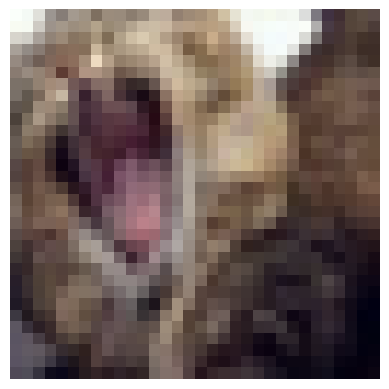

In [ ]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


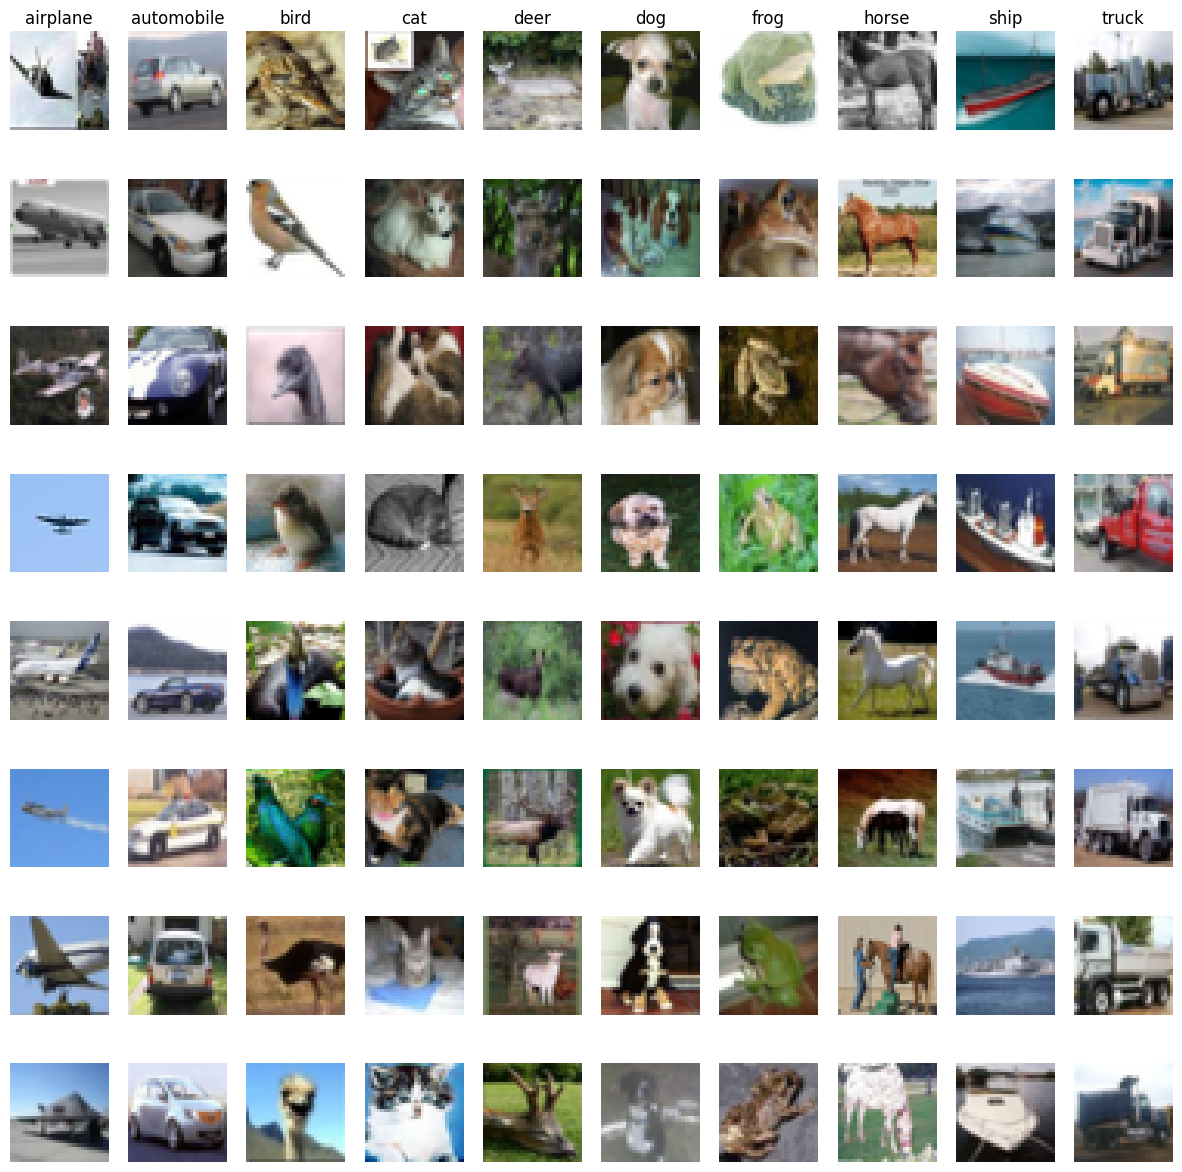

In [ ]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [ ]:
def accuracy(model, data_loader, device):
    num_correct = 0
    num_total = 0
    cost = 0.0
    model.eval()
    model = model.to(device=device)

    with torch.no_grad():
        for xi, yi in data_loader:
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)  # Shape: (mb_size, num_classes)
            cost += F.cross_entropy(scores, yi).item()
            _, pred = scores.max(dim=1)  # pred shape: (mb_size,)
            num_correct += (pred == yi.squeeze()).sum().item()  # Convert to int
            num_total += pred.size(0)

    average_cost = cost / len(data_loader)  # Promedio de costo sobre el número de batches
    accuracy = float(num_correct) / num_total if num_total > 0 else 0.0
    return average_cost, accuracy

### Loop de entrenamiento

In [ ]:
def train(model, optimiser, train_loader, val_loader, epochs=100, device='cpu'):
    model = model.to(device=device)

    for epoch in range(epochs):
        model.train()
        train_correct_num = 0
        train_total = 0
        train_cost_acum = 0.0

        for xi, yi in train_loader:
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)

            # Forward pass
            scores = model(xi)

            # Compute loss
            cost = F.cross_entropy(input=scores, target=yi.squeeze())
            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            # Accuracy calculation
            train_correct_num += (torch.argmax(scores, dim=1) == yi.squeeze()).sum().item()  # Convert to int
            train_total += scores.size(0)
            train_cost_acum += cost.item()

        # Validation
        val_cost, val_acc = accuracy(model, val_loader, device)
        train_acc = float(train_correct_num) / train_total
        train_cost = train_cost_acum / len(train_loader)  # Promedio de costo sobre los batches

        if epoch % 20 == 0:
            print(f'Epoch: {epoch}, train cost: {train_cost:.6f}, val cost: {val_cost:.6f}, '
                  f'train acc: {train_acc:.4f}, val acc: {val_acc:.4f}, '
                  f'lr: {optimiser.param_groups[0]["lr"]:.6f}')

### Linear model

In [ ]:
# Definición del modelo lineal
class LinearModel(nn.Module):
    def __init__(self, hidden_units=200):
        super(LinearModel, self).__init__()
        self.flatten = nn.Flatten()  # Aplanar la entrada
        self.network = nn.Sequential(
            nn.Linear(in_features=3072, out_features=hidden_units),  # Cambia a 3072
            nn.Dropout(),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=24)
        )

    def forward(self, x):
        x = self.flatten(x)  # Aplanar aquí
        return self.network(x)

# Instanciar modelo
hidden = 200
lr = 1e-3
epochs = 100
mb_size = 128

model1 = LinearModel(hidden_units=hidden)

# Optimizer
optimiser = torch.optim.Adam(model1.parameters(), lr=lr, weight_decay=1e-4)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimiser, max_lr=0.1, epochs=epochs, steps_per_epoch=len(train_loader))

# Asegúrate de que `train_loader` esté definido y contenga los datos de entrenamiento

In [ ]:
train(model1, optimiser, train_loader, val_loader, epochs=epochs, device='cuda' if torch.cuda.is_available() else 'cpu')

Epoch: 0, train cost: 2.638749, val cost: 2.169691, train acc: 0.2705, val acc: 0.3466, lr: 0.004000
Epoch: 20, train cost: 2.554280, val cost: 2.290398, train acc: 0.2969, val acc: 0.3406, lr: 0.004000
Epoch: 40, train cost: 2.567317, val cost: 2.124694, train acc: 0.2918, val acc: 0.3508, lr: 0.004000
Epoch: 60, train cost: 2.534126, val cost: 1.993330, train acc: 0.2972, val acc: 0.3622, lr: 0.004000
Epoch: 80, train cost: 2.520622, val cost: 2.072606, train acc: 0.2952, val acc: 0.3484, lr: 0.004000




  ## Arquitectura del Modelo

- **Capas Convolucionales**:
  - **Conv1**: La primera capa convolucional toma una entrada con 3 canales (RGB) y produce 32 mapas de características utilizando un kernel de 3x3 y padding de 1.
  - **Conv2**: La segunda capa aumenta la profundidad a 64 mapas de características, manteniendo el mismo tamaño de kernel y padding.
  - **Conv3**: La tercera capa produce 128 mapas de características, continuando con la misma configuración.

Se utiliza un dropout del 50% después de la primera capa totalmente conectada para ayudar a prevenir el sobreajuste.


### Comparación con Modelo de Red Totalmente Conectada


Se comprobó que un modelo lineal solo alcanza entre un 10% a 30% de accuracy para casos como el CIFAR10, esto debido a las limitaciones propias del modelo. Por otra parte  las  redes neuronales convolucionales son más eficientes en términos de parámetros y cómputo, ya que comparten pesos a través de la entrada, mejorando significativamente las métricas aun desde el modelo inicial implementado.
  

## Desafíos Enfrentados


- **Ajuste de Hiperparámetros**:
  - Encontrar los hiperparámetros óptimos ( tasa de aprendizaje y el tamaño del batch) requirió múltiples experimentos y ajustes.

- **Sobreajuste**:
  - Inicialmente, el modelo mostró signos de sobreajuste, lo que llevó a la implementación de la capa de dropout y ajustes en la tasa de aprendizaje.


CONCLUSIÓN

El modelo CNN diseñado representó una mejora significativa respecto a los modelos de red totalmente conectada en tareas de clasificación de imágenes. Su capacidad para aprender representaciones jerárquicas a través de capas convolucionales le permite extraer características relevantes de manera más efectiva. .

### Sequential CNN

In [ ]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than
#the linear model

class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)  # Capa convolucional 1
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)  # Capa convolucional 2
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)  # Capa convolucional 3

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Capa de pooling
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # Capa totalmente conectada
        self.fc2 = nn.Linear(256, num_classes)  # Capa de salida

        self.dropout = nn.Dropout(0.5)  # Capa de Dropout para prevenir sobreajuste

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pool
        x = self.pool(F.relu(self.conv3(x)))  # Conv3 -> ReLU -> Pool
        x = x.view(-1, 128 * 4 * 4)  # Aplanar
        x = self.dropout(F.relu(self.fc1(x)))  # FC1 -> ReLU -> Dropout
        x = self.fc2(x)  # Capa de salida
        return x

# Instanciar el modelo
modelCNN1 = CNNModel(num_classes=10)

# Optimizer
optimiser_cnn = torch.optim.Adam(modelCNN1.parameters(), lr=1e-3, weight_decay=1e-4)

# Learning rate scheduler
scheduler_cnn = torch.optim.lr_scheduler.OneCycleLR(optimiser_cnn, max_lr=0.01, epochs=100, steps_per_epoch=len(train_loader))

In [ ]:
train(modelCNN1 , optimiser_cnn, train_loader, val_loader, epochs=100, device='cuda' if torch.cuda.is_available() else 'cpu')

Epoch: 0, train cost: 1.577037, val cost: 1.212339, train acc: 0.4223, val acc: 0.5716, lr: 0.000400
Epoch: 20, train cost: 0.244967, val cost: 0.862221, train acc: 0.9115, val acc: 0.7700, lr: 0.000400
Epoch: 40, train cost: 0.101634, val cost: 1.246101, train acc: 0.9640, val acc: 0.7718, lr: 0.000400
Epoch: 60, train cost: 0.076771, val cost: 1.362624, train acc: 0.9732, val acc: 0.7720, lr: 0.000400
Epoch: 80, train cost: 0.066992, val cost: 1.392741, train acc: 0.9766, val acc: 0.7714, lr: 0.000400




##Arquitectura Optimizada(versión 2)


## Justificación de la Arquitectura y Hiperparámetros del Modelo CNN


 Se consideró una arquitectura de 3 capas para mantener la simplicidad y facilitiar el entrenamiento y pruebas. Cabe mencionar que una CNN de 3 capas suele ser suficiente para problemas de clasificación de imagene con data sets pequeños(Sumado a que el conjunto CIFAR10 provee de imagenes de baja resolución).


Un número limitado de capas puede ayudar a evitar el sobreajuste, sobre todo  cuando el tamaño del conjunto de datos no es grande. Un modelo más complejo pudiera aprender relaciones especificas del conjunto de entrenamiento y que no generalicen bien.

#Consideraciones adicionales:

   - La inclusión de capas de Batch Normalization mejora la estabilidad del entrenamiento y acelera la convergencia. Esta técnica normaliza las salidas de cada capa, lo que ayuda a mitigar el problema del "desvanecimiento del gradiente" y permite el uso de tasas de aprendizaje más altas.

   - Las capas de max pooling se utilizan para reducir la dimensionalidad de las características extraídas. Retiendo así las  características más importantes y reduce el riesgo de sobreajuste al eliminar información redundante.

   - Se incluye una capa totalmente conectada (fc1) para combinar las características extraídas por las capas convolucionales y realizar la clasificación final. Esto permite al modelo aprender relaciones complejas entre las características.

   - La capa de salida (fc2) se configura para que coincida con el número de clases del problema, permitiendo la clasificación multiclase.


##  Hiperparámetros

1. **Learning rate**

   - Se ha configurado la tasa de aprendizaje inicial en `1e-3`, lo que es común para el optimizador Adam, permitiendo un equilibrio entre la velocidad de convergencia y la estabilidad del entrenamiento.

   - La tasa de aprendizaje se ajusta dinámicamente utilizando un scheduler OneCycleLR, lo que permite que el modelo aumente inicialmente la tasa de aprendizaje y luego la reduzca.

2- **Optimizador** - Se ha elegido el optimizador Adam debido a su capacidad para manejar el desvanecimiento del gradiente y su adaptabilidad a diferentes tasas de aprendizaje.

3. **Dropout**:
   - La tasa de dropout del 50% se eligió como un equilibrio efectivo entre prevenir el sobreajuste y mantener suficiente capacidad de aprendizaje en el modelo. Este valor es común en arquitecturas similares y se basa en la experiencia empírica.



In [ ]:
class ImprovedCNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(ImprovedCNNModel, self).__init__()

        # Capas convolucionales con Batch Normalization
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Batch Normalization
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)  # Batch Normalization

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Capa de pooling

        # Capa totalmente conectada
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # Capa totalmente conectada
        self.fc2 = nn.Linear(256, num_classes)  # Capa de salida

        self.dropout = nn.Dropout(0.5)  # Capa de Dropout para prevenir sobreajuste

    def forward(self, x):
        # Aplicar convoluciones, normalización, ReLU y max pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Conv1 -> BN -> ReLU -> Pool
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Conv2 -> BN -> ReLU -> Pool
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Conv3 -> BN -> ReLU -> Pool

        x = x.view(-1, 128 * 4 * 4)  # Aplanar
        x = self.dropout(F.relu(self.fc1(x)))  # FC1 -> ReLU -> Dropout
        x = self.fc2(x)  # Capa de salida
        return x

# Instanciar el modelo
modelCNN2 = ImprovedCNNModel(num_classes=10)

# Optimizer
optimiser_cnn = torch.optim.Adam(modelCNN2.parameters(), lr=1e-3, weight_decay=1e-4)

# Learning rate scheduler
scheduler_cnn = torch.optim.lr_scheduler.OneCycleLR(optimiser_cnn, max_lr=0.01, epochs=100, steps_per_epoch=len(train_loader))

In [ ]:
train(modelCNN2 , optimiser_cnn, train_loader, val_loader, epochs=100, device='cuda' if torch.cuda.is_available() else 'cpu')

Epoch: 0, train cost: 1.360815, val cost: 1.042012, train acc: 0.5068, val acc: 0.6314, lr: 0.000400
Epoch: 20, train cost: 0.265910, val cost: 0.720985, train acc: 0.9040, val acc: 0.7930, lr: 0.000400
Epoch: 40, train cost: 0.125771, val cost: 1.070979, train acc: 0.9552, val acc: 0.7906, lr: 0.000400
Epoch: 60, train cost: 0.085245, val cost: 1.140902, train acc: 0.9709, val acc: 0.7866, lr: 0.000400
Epoch: 80, train cost: 0.072544, val cost: 1.242478, train acc: 0.9748, val acc: 0.7794, lr: 0.000400


# Se incrementa el número de epocas para mejorar rendimiento y que el modelo pueda extraer más caracteristicas complejas.

In [ ]:
train(modelCNN2 , optimiser_cnn, train_loader, val_loader, epochs=140, device='cuda' if torch.cuda.is_available() else 'cpu')

Epoch: 0, train cost: 0.057995, val cost: 1.317507, train acc: 0.9804, val acc: 0.7846, lr: 0.000400
Epoch: 20, train cost: 0.055951, val cost: 1.371419, train acc: 0.9814, val acc: 0.7886, lr: 0.000400
Epoch: 40, train cost: 0.049022, val cost: 1.373262, train acc: 0.9832, val acc: 0.7794, lr: 0.000400
Epoch: 60, train cost: 0.045401, val cost: 1.418051, train acc: 0.9850, val acc: 0.7818, lr: 0.000400
Epoch: 80, train cost: 0.043854, val cost: 1.407174, train acc: 0.9853, val acc: 0.7788, lr: 0.000400
Epoch: 100, train cost: 0.037570, val cost: 1.310273, train acc: 0.9876, val acc: 0.7836, lr: 0.000400
Epoch: 120, train cost: 0.036113, val cost: 1.399320, train acc: 0.9879, val acc: 0.7686, lr: 0.000400
